# Milestone 1

Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 1 dalam konsep Supervised Learning.

# Table of Contents

1. Introduction
2. Import Libraries
3. Data Loading
4. Exploratory Data Analysis
5. Data Preprocessing
6. Model Definition
7. Model Training
8. Model Evaluation
9. Model Inference
10. Conclusion
11. Conceptual Problems


# 1. Introduction

**Name** : Reza Ismail Hasan

**Class** : HCK - 01


### 1.1 About Dataset

Dataset yang digunakan berasal dari google Big Query public data. Menggunakan `ml_datasets` dari database bernama `credit_card_default`.

- limit_balance = Amount of given credit in NT dollars (includes individual and family/supplementary credit
- sex = Gender (1=male, 2=female)
- education_level = Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- marital_status = Marital status (1=married, 2=single, 3=others)	
- age = age in years
- pay_0 = Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- pay_2 = Repayment status in August, 2005 (scale same as above)
- pay_3 = Repayment status in July, 2005 (scale same as above)
- pay_4 = Repayment status in June, 2005 (scale same as above)
- pay_5 = Repayment status in May, 2005 (scale same as above)
- pay_6 = Repayment status in April, 2005 (scale same as above)
- bill_amt_1 = 	Amount of bill statement in September, 2005 (NT dollar)
- bill_amt_2 = 	Amount of bill statement in August, 2005 (NT dollar)
- bill_amt_3 = 	Amount of bill statement in July, 2005 (NT dollar)
- bill_amt_4 = 	Amount of bill statement in June, 2005 (NT dollar)
- bill_amt_5 = 	Amount of bill statement in May, 2005 (NT dollar)
- bill_amt_6 = 	Amount of bill statement in April, 2005 (NT dollar)
- pay_amt_1 = Amount of previous payment in September, 2005 (NT dollar)
- pay_amt_2 = Amount of previous payment in August, 2005 (NT dollar)
- pay_amt_3 = Amount of previous payment in July, 2005 (NT dollar)
- pay_amt_4 = Amount of previous payment in June, 2005 (NT dollar)
- pay_amt_5 = Amount of previous payment in May, 2005 (NT dollar)
- pay_amt_6 = Amount of previous payment in April, 2005 (NT dollar)
- default_payment_next_month =  Default payment (1=yes, 0=no)






### 1.2 Query Documentation

SELECT 

limit_balance, sex, education_level, marital_status, 
age, 

pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, 

bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, 

pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month 

FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 29895


### 1.3 Objective

Membuat model Classification untuk memprediksi default_payment_next_month menggunakan dataset yang sudah kalian simpan.


# 2. Import Libraries

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, mean_absolute_error, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer

from time import time
import warnings

warnings.simplefilter('ignore')

# 3. Data Loading

In [75]:
df=pd.read_csv("/Users/rezaismail/Hacktiv8/Phase 1/Asignment/Miletones/h8dsft_P1M1_Reza_Ismail.csv")
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


In [76]:
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

dari info diatas menunjukkan bahwa tidak ada missing value pada dataframe dan semua kolom merupakan data numerik. Target/label merupakan kolom `default_payment_next_month` untuk memudahkan pada perhitungan kita lakukan rename menjadi kolom `default_payment`.
`pay_0` direname menjadi `pay_1` untuk mencegah missunderstanding.

Dari keterangan pada bagian deskripsi dataset kolom sex, education_level, marital_tatus, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, default_payment_next_month merupakan data kategorikal. Maka semua data tersebut harus menggunakan data type int_64

In [78]:
df_copy = df.copy()

In [79]:
df_copy = df_copy.rename(columns={'default_payment_next_month': 'default_payment'})

In [80]:
df_copy = df_copy.rename(columns={'pay_0': 'pay_1'})

In [81]:
df_copy = df_copy.astype({'age': 'int64', 'pay_1': 'int64', 'pay_2': 'int64', 'pay_3': 'int64', 'pay_4': 'int64'})

In [82]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_balance    2965 non-null   float64
 1   sex              2965 non-null   int64  
 2   education_level  2965 non-null   int64  
 3   marital_status   2965 non-null   int64  
 4   age              2965 non-null   int64  
 5   pay_1            2965 non-null   int64  
 6   pay_2            2965 non-null   int64  
 7   pay_3            2965 non-null   int64  
 8   pay_4            2965 non-null   int64  
 9   pay_5            2965 non-null   int64  
 10  pay_6            2965 non-null   int64  
 11  bill_amt_1       2965 non-null   float64
 12  bill_amt_2       2965 non-null   float64
 13  bill_amt_3       2965 non-null   float64
 14  bill_amt_4       2965 non-null   float64
 15  bill_amt_5       2965 non-null   float64
 16  bill_amt_6       2965 non-null   float64
 17  pay_amt_1     

In [83]:
df_copy.shape

(2965, 24)

Dataset terdiri dari 2965 baris dan 24 kolom

In [84]:
df_copy.duplicated().sum()

1

terdapat 1 data duplikat, perlu dihapus untuk menghindari kebocoran data.

In [85]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [86]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_1,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


data pay_1 sampai pay_6 memiliki range -2 sampai 8, ada perbedaan dengan deskripsi dataset yang seharusnya memiliki nilai minimal -1.

'''
pay_0 = Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
'''


####  Splitting data train and data test

Membagi data train dan test dengan rasio 80/20

In [87]:
# split train and test data
train, test = train_test_split(df_copy, test_size=0.2, random_state=50)

# 4. Exploratory Data Analysis

Terdapat 3 tipe pada dataset:

1. Data Numerik : `limit_balance`, `bill_amt_1`, `bill_amt_2`, `bill_amt_3`, `bill_amt_4`, `bill_amt_5`, `bill_amt_6`, `pay_amt_1`, `pay_amt_2`, `pay_amt_3`, `pay_amt_4`, `pay_amt_5`, `pay_amt_6`, `age`.

2. Data kategorikal : `sex`, `education_level`, `marital_status`, `pay_1`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, `pay_6`.

3. Data Target : `default_payment`

Untuk setiap dataset saya lakukan eksplorasi data yang berbeda.


### 4.1 Eksplorasi Data Numerik

Untuk data numerik kita cek distribusi data tiap kolom dan korelasi dengan kolom target.

In [88]:
# defining a function to determine outlier existence

def outlier_analysis(df,col):
  skewness = df[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df[col].mean() + 3*df[col].std()
    lower = df[col].mean() - 3*df[col].std()
  else:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q1 + 1.5*IQR
    lower = Q3 - 1.5*IQR
  
  no_outliers = df[(df[col]>=lower) & (df[col]<=upper)]
  outliers = df[(df[col]<lower) | (df[col]>upper)]

  return outliers,no_outliers, upper, lower

# defining a function to plot the distribution of data
def plot_numerical(df, feature):
    fig, axes = plt.subplots(len(feature),2, figsize=(20, 100))
    x = 0
    for c, ax in zip(feature, axes):
        skew = df[c].skew()
        out,no_out, up, low = outlier_analysis(df,feature[x])
        p_out = len(out)*100/len(df)
        
        _ = sns.histplot(x=df[c], ax=ax[0], bins=50)
        ax[0].set_title(f'Distribution of {c} (skewness = {skew:.3f})')
        
        _ = sns.boxplot(x=df[c], ax=ax[1])
        ax[1].set_title(f'''Boxplot of {c} with Outlier Percentage : {p_out:.3f}%''')
        x += 1

    plt.tight_layout()

# defining a function to plot the correlation of features and target
def plot_heatmap(df, feature, target):
    plt.figure(figsize=(20,15))
    
    sns.set(font_scale=1.4)
    _ = sns.heatmap(pd.concat([df[feature], df[target]], axis=1).corr(), annot=True);
    _.set_title(f'Correlation heatmap')

In [89]:
num_col = ['limit_balance', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'age']

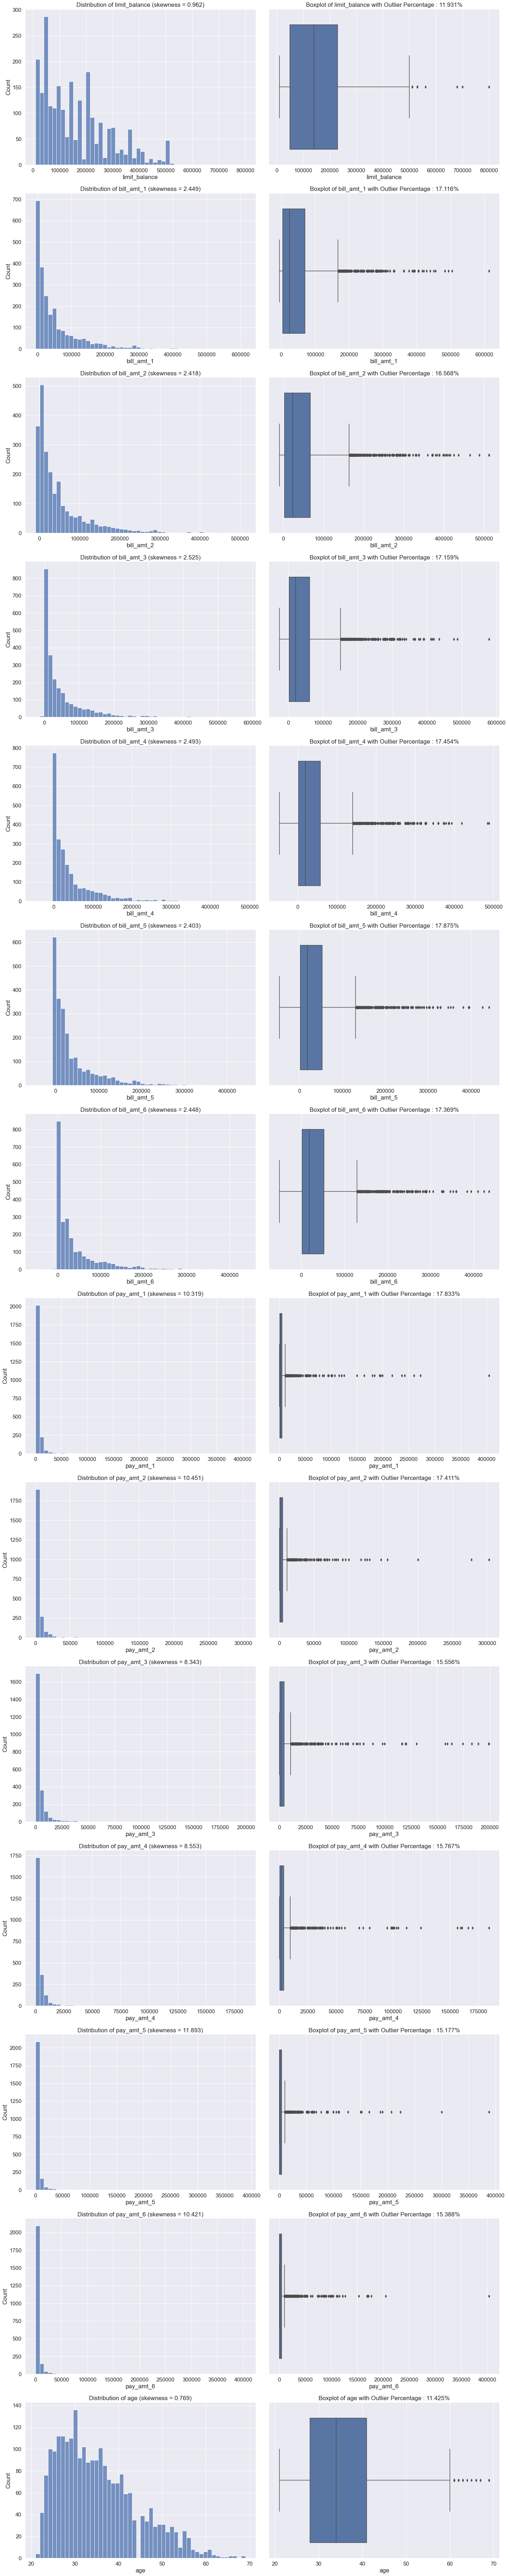

In [90]:
plot_numerical(train, num_col)

- Semua kolom numerik memiliki distribusi yang tidak normal dengan jumlah outlier lebih dari 11%.  

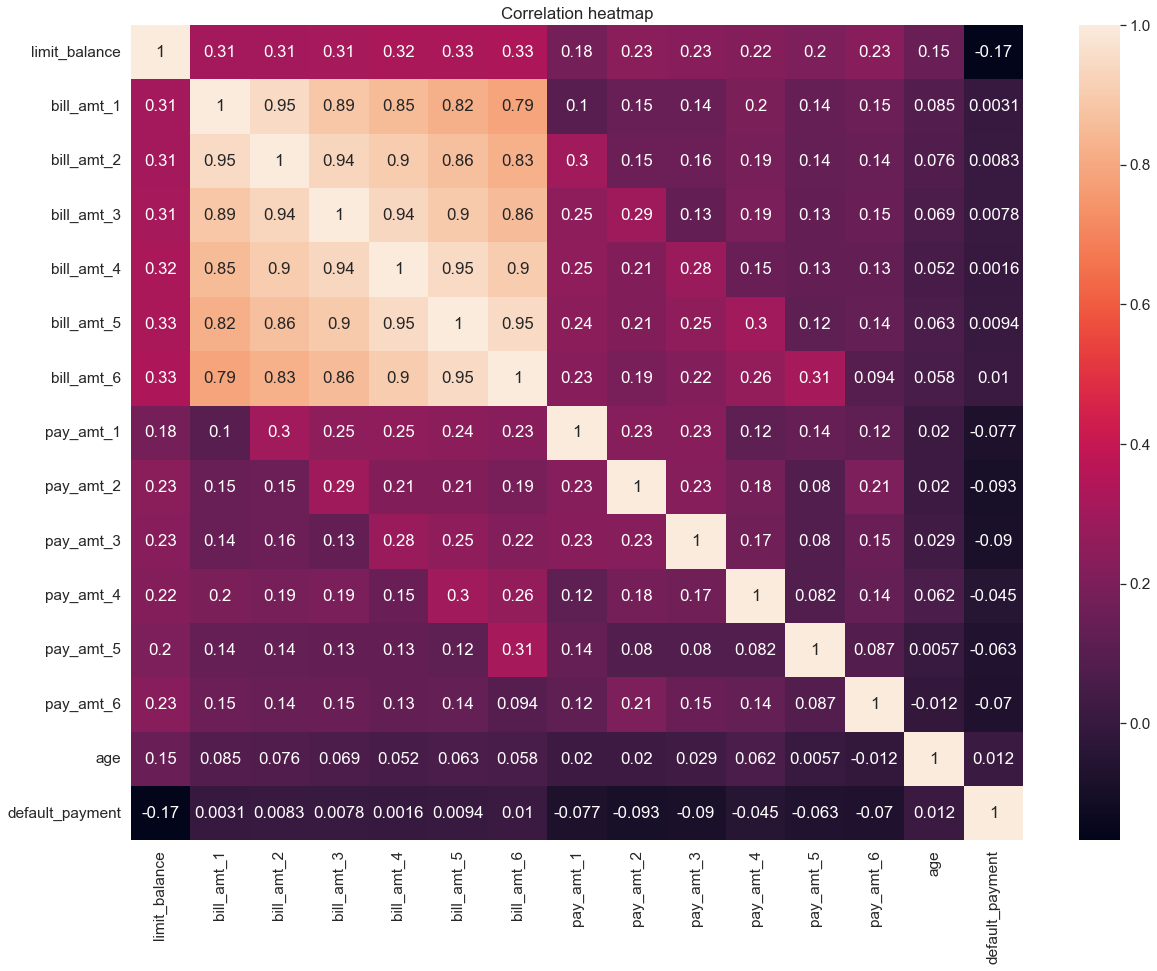

In [91]:
plot_heatmap(train, num_col, 'default_payment')

Dari heatmap diatas menunjukkan kolom fitur memiliki korelasi yang sangat kecil dati target (default_payment). Hal ini kemungkinan disebabkan kolom target merupakan data kategorikal, sehingga untuk menentukan fitur dengan metode ini kurang tepat. 

Selain itu kita lihat bahwa `bill_amount` dari bulan ke bulan memiliki korelasi yang cukup besar, sedangkan `pay_amt` ada sedikit korelasi dari bulan ke bulan.

#### Multicollinearity test

In [92]:
# Multicollinearity Test

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [93]:
mul = train[num_col]
calc_vif(mul)

,variables,VIF
0,limit_balance,3.444902
1,bill_amt_1,23.486569
2,bill_amt_2,40.840077
3,bill_amt_3,29.236244
4,bill_amt_4,34.992568
5,bill_amt_5,42.822704
6,bill_amt_6,24.775062
7,pay_amt_1,2.173801
8,pay_amt_2,1.761648
9,pay_amt_3,1.780943


karena semua nilai bill_amt memiliki korelasi yang besar antar kolomnya, untuk perhitungan model cukup diambil salah satu yang paling berpengaruh.

### 4.2 Eksplorasi Data Kategorik

In [94]:
target = ['default_payment']
cat_cols = ['sex', 'education_level', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

#### Kolom Target 

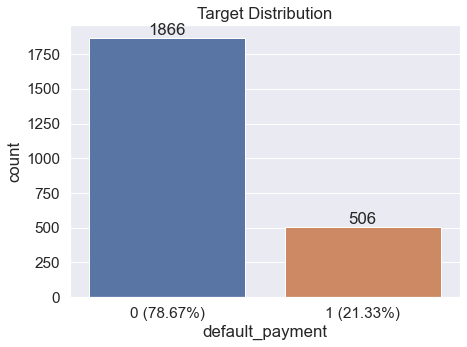

In [95]:
plt.figure(figsize=(7,5))

cnt = sns.countplot(x=train['default_payment'])
cnt.bar_label(cnt.containers[0]);

pct_0 = train['default_payment'].value_counts()[0]*100 / train.shape[0]

cnt.set_xticklabels([f'0 ({pct_0:.2f}%)', f'1 ({100-pct_0:.2f}%)']);
cnt.set_title(f'Target Distribution')

plt.show;

Dari data diatas kita dapat lihat, proporsi pada kolom target tidak seimbang antara label 1 (21.33%) dan label 0 (78.67%).

#### Kolom Fitur 

In [96]:
# defining a function to plot a bar chart
def bar_chart(df, feature):
    fig, axes = plt.subplots(int(np.ceil(len(feature)/2)), 2, figsize=(14,20))

    # flat the axes to be in one line of list
    axes = axes.flatten()
    
    # Use for loop to plot all of the categorical data into bar chart
    for c, ax in zip(feature, axes):
        n_cat = df[c].nunique()
        _ = df[c].value_counts().sort_values(ascending=False).plot(kind='bar', fontsize=10, ax=ax, title=f'{c} ({n_cat} categories)');
        _ = ax.set_ylabel('')
    _ = plt.tight_layout()

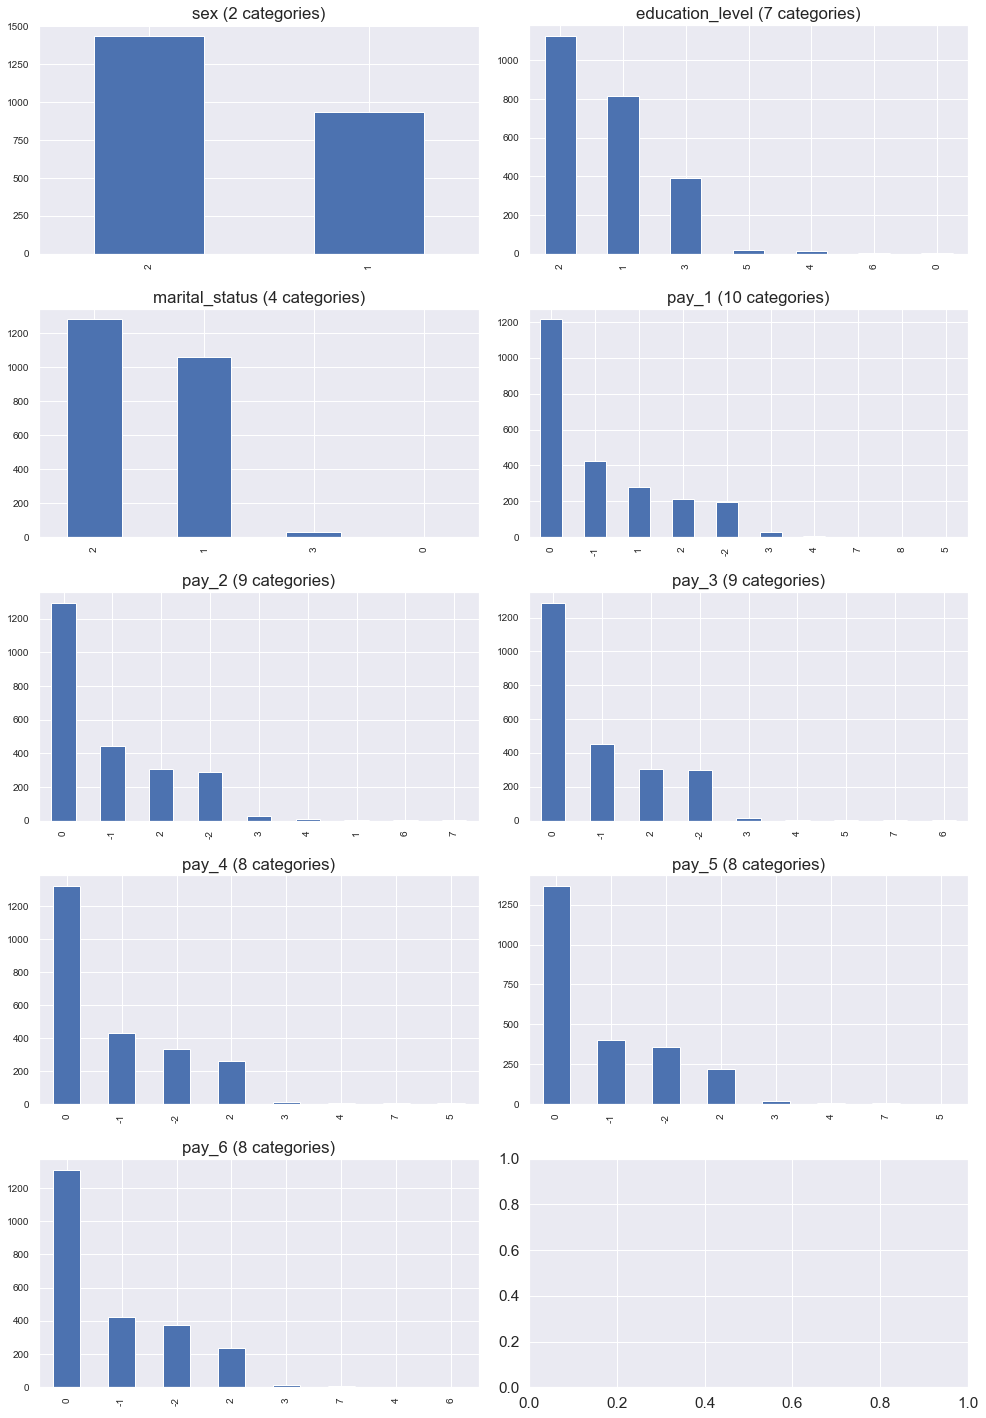

In [97]:
bar_chart(train, cat_cols)

**Kesimpulan EDA**

1. Semua kolom numerik memiliki distribusi yang tidak normal dengan jumlah outlier lebih dari 11%.  
2. `bill_amount` dari bulan ke bulan memiliki korelasi yang cukup besar untuk seleksi fitur cukup pilih salah satu saja

# 5. Data Preprocessing

### 5.1 Feature Selection


In [98]:
new_train = train.copy()
new_test = test.copy()

In [99]:
X_train = new_train.drop(columns='default_payment')
y_train = new_train['default_payment']

X_test = new_test.drop(columns='default_payment')
y_test = new_test['default_payment']

In [100]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.03363053, 0.        , 0.00283636, 0.00082918, 0.        ,
       0.09367904, 0.04794823, 0.03476289, 0.05396734, 0.0597234 ,
       0.02392897, 0.00388898, 0.00403702, 0.00683597, 0.0144004 ,
       0.00816123, 0.00327995, 0.01872025, 0.01678422, 0.01492411,
       0.0050333 , 0.01363082, 0.01858965])

In [101]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

pay_1              0.093679
pay_5              0.059723
pay_4              0.053967
pay_2              0.047948
pay_3              0.034763
limit_balance      0.033631
pay_6              0.023929
pay_amt_1          0.018720
pay_amt_6          0.018590
pay_amt_2          0.016784
pay_amt_3          0.014924
bill_amt_4         0.014400
pay_amt_5          0.013631
bill_amt_5         0.008161
bill_amt_3         0.006836
pay_amt_4          0.005033
bill_amt_2         0.004037
bill_amt_1         0.003889
bill_amt_6         0.003280
education_level    0.002836
marital_status     0.000829
age                0.000000
sex                0.000000
dtype: float64

Pada feature selection dengan metode mutual info clasifier. `pay_1` sampai dengan `pay 6` sangat berpengaruh terhadap klasifikasi default payment.

Pemilihan fitur dilakukan dengan 2 pertimbangan :
1. tidak mengambil fitur dengan mutual info = 0
2. Hanya bill amt 4 yang diambil karena memiliki nilai multicollinearity yang besar.

In [104]:
# seperating features accoding to their datatype plus the target
feature_num = ['age', 'bill_amt_4','pay_amt_1', 'pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6','limit_balance']
feature_cat_nom = ['sex', 'marital_status']
feature_cat_ord = ['education_level', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
target = ['default_payment']

### 5.3 Train Data Preprocessing

In [105]:
# select feature for train and test data
train_selected = train[feature_num + feature_cat_nom + feature_cat_ord + target]
test_selected = test[feature_num + feature_cat_nom + feature_cat_ord + target]
train_selected.head(3)

,age,bill_amt_4,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,limit_balance,sex,marital_status,education_level,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment
21,43,25638.0,77225.0,21903.0,25646.0,5080.0,0.0,5052.0,120000.0,2,2,2,0,0,0,-1,0,0,0
1388,23,30408.0,2230.0,2000.0,4300.0,1000.0,0.0,2000.0,60000.0,2,1,2,0,0,0,0,2,2,0
567,30,76244.0,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0,300000.0,2,1,1,0,0,0,0,0,0,1


In [106]:
print('Train Size : ', train_selected.shape)
print('Test Size  : ', test_selected.shape)

Train Size :  (2372, 19)
Test Size  :  (593, 19)


### • Data for model inference

In [107]:
# Get Data for Model Inference
df_inf = train_selected.sample(10, random_state=50)
df_inf.head(3)

,age,bill_amt_4,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,limit_balance,sex,marital_status,education_level,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment
2150,41,0.0,5017.0,1103.0,0.0,0.0,0.0,0.0,50000.0,1,1,3,-2,-2,-2,-2,-2,-2,0
1176,27,15972.0,14443.0,4938.0,5972.0,7952.0,2925.0,1718.0,200000.0,2,2,1,0,0,0,0,0,0,0
536,30,167458.0,8155.0,10048.0,6011.0,6010.0,6514.0,10011.0,280000.0,2,1,1,0,0,0,0,0,0,0


In [108]:
# Remove Inference-Set from Dataset
train_selected = train_selected.drop(df_inf.index)
train_selected.shape

(2362, 19)

In [109]:
# Reset Index 
train_selected.reset_index(drop=True, inplace=True) 
df_inf.reset_index(drop=True, inplace=True)

### • Handling outliers

In [110]:
# Defining a function to analyze outlier in the data
def outlier_analysis(df, col):
    skewness = df[col].skew()
    if skewness >= 0.5 and skewness<=0.5:
        upper = df[col].mean() + 3*df[col].std()
        lower = df[col].mean() - 3*df[col].std()
        method = 'Z-Score'
    else:
        q3 = df[col].quantile(0.75)
        q1 = df[col].quantile(0.25)
        iqr = q3 - q1
        upper_bound = q3 + (iqr * 3)
        lower_bound = q1 - (iqr * 3)
        method = 'IQR'

    outlier = df.loc[(df[col] > upper_bound) | (df[col] < lower_bound)]
    
    return outlier, method, upper_bound, lower_bound

In [111]:
# using for loop to go through every numerical column and handle their outliers
for col in feature_num:
    out, method, up, low = outlier_analysis(train, col)
    pct_out = (len(out)/len(train))*100
    
    # if outliers percentage is under 10%, we will drop the data
    if pct_out <= 10:
        train_selected = train_selected[(train_selected[col]>=low) & (train_selected[col]<=up)]
    # if outliers percentage is over 10%, we will cap the outliers 
    else:
        train_selected[col] = train_selected[col].apply(lambda x: up if x>=up else low if x<=low else x)

In [112]:
train_selected.shape

(1862, 19)

### • Handling missing values

In [113]:
# Finding missing values
train_selected.isnull().sum()

age                0
bill_amt_4         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
limit_balance      0
sex                0
marital_status     0
education_level    0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
default_payment    0
dtype: int64

### • Splitting between `X` (Features) and `y` (Target)

In [114]:
# Split between Train-Set and Test-Set
X_train = train_selected[feature_num + feature_cat_nom + feature_cat_ord]
X_test = test_selected[feature_num + feature_cat_nom + feature_cat_ord]
y_train = train_selected[target]
y_test = test_selected[target]

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (1862, 18)
Test Size  :  (593, 18)


### • Splitting Numerical Columns and Categorical Columns

In [115]:
# Split between numerical and categorical features
X_train_num = X_train[feature_num]
X_train_cat = X_train[feature_cat_nom + feature_cat_ord]

X_test_num = X_test[feature_num]
X_test_cat = X_test[feature_cat_nom + feature_cat_ord]


### • Cardinalty Handling

In [116]:
# check cardinaly of each categorical feature
X_train_cat.nunique()

sex                2
marital_status     4
education_level    7
pay_1              8
pay_2              8
pay_3              9
pay_4              8
pay_5              8
pay_6              8
dtype: int64

Setiap kategori pada kolom `feature` tidak perlu dihandling kardinalitasnya karena nilainya masih relatif bisa diterima (dibawah 10)

### • Feature encoding

In [117]:
# using one hot encoder to encode the categorical data
encoder = OneHotEncoder()

encoded_X_train = pd.DataFrame(encoder.fit_transform(X_train_cat[feature_cat_nom]).toarray())
encoded_X_test = pd.DataFrame(encoder.transform(X_test_cat[feature_cat_nom]).toarray())
encoded_X_train

,0,1,2,3,4,5
0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
1857,1.0,0.0,0.0,0.0,1.0,0.0
1858,0.0,1.0,0.0,1.0,0.0,0.0
1859,0.0,1.0,0.0,1.0,0.0,0.0
1860,0.0,1.0,0.0,0.0,1.0,0.0


#### • Feature Scaling

In [118]:
# finding the suitable scaling method for feature scaling
norm = 0
nonorm = 0
for col in X_train_num.columns:
    if X_train_num[col].skew() >=-0.5 and train[col].skew() <0.5:
        norm += 1
    else:
        nonorm +=1
        
    if norm > nonorm:
        scaler = StandardScaler()
    else:
        scaler = MinMaxScaler()
scaler

MinMaxScaler()

Min Max Scaler digunakan kaena lebih banyak kolom numerik yang terdistribusi tidak normal

In [119]:
# Feature scaling using MinMax Scaler
scaled_X_train = scaler.fit_transform(X_train_num)
scaled_X_test = scaler.transform(X_test_num)

scaled_X_train

array([[0.04166667, 0.28951166, 0.13106853, ..., 0.        , 0.12704866,
        0.07462687],
       [0.16666667, 0.186451  , 0.07147055, ..., 0.0797483 , 0.19444797,
        0.19402985],
       [0.14583333, 0.33832295, 0.10620665, ..., 0.6420958 , 0.11294626,
        0.05970149],
       ...,
       [0.60416667, 0.18517321, 0.18919713, ..., 0.09432387, 0.22169991,
        0.2238806 ],
       [0.45833333, 0.18425246, 0.        , ..., 0.        , 0.        ,
        0.05970149],
       [0.16666667, 0.23745706, 0.18872693, ..., 0.09881854, 0.04446703,
        0.02985075]])

### • Concate between numerical features and categorical features

In [120]:
# Concate Columns
X_train_final = np.concatenate([scaled_X_train, X_train_cat[feature_cat_ord] ,encoded_X_train], axis=1)
X_test_final = np.concatenate([scaled_X_test, X_test_cat[feature_cat_ord], encoded_X_test], axis=1)

In [121]:
# Create DataFrame of `X_train_final` and `X_test_final_df`
X_train_final_df = pd.DataFrame(X_train_final, columns=[feature_num+feature_cat_ord+list(range(encoded_X_train.shape[1]))])
X_test_final_df = pd.DataFrame(X_test_final, columns=[feature_num+feature_cat_ord+list(range(encoded_X_train.shape[1]))])
X_train_final_df

,age,bill_amt_4,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,limit_balance,education_level,...,pay_3,pay_4,pay_5,pay_6,0,1,2,3,4,5
0,0.041667,0.289512,0.131069,0.114587,0.252941,0.066569,0.000000,0.127049,0.074627,2.0,...,0.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.166667,0.186451,0.071471,0.154578,0.357000,0.258887,0.079748,0.194448,0.194030,1.0,...,-1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.145833,0.338323,0.106207,0.115504,0.105647,0.104513,0.642096,0.112946,0.059701,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.229167,0.688341,0.440813,0.401054,0.294118,0.332845,0.385257,0.326324,0.253731,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.104167,0.567520,0.000000,0.372236,0.470647,0.000000,0.256838,0.241456,0.223881,1.0,...,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,0.250000,0.303759,0.293876,0.579581,0.294118,0.399414,0.192629,0.444670,0.208955,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1858,0.229167,0.203085,0.000000,0.108858,0.435941,0.126481,0.000000,0.000000,0.104478,1.0,...,-1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,1.0,0.0,0.0
1859,0.604167,0.185173,0.189197,0.190329,0.155588,0.069831,0.094324,0.221700,0.223881,2.0,...,-2.0,-2.0,-2.0,-2.0,0.0,1.0,0.0,1.0,0.0,0.0
1860,0.458333,0.184252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059701,3.0,...,7.0,7.0,7.0,7.0,0.0,1.0,0.0,0.0,1.0,0.0


# 6. Model Definition

In [122]:
# Logistic Regression Model
logreg = LogisticRegression(random_state=50)

# SVM 
s_model = SVC(random_state=50, probability=True)

# Decision Tree Model
dtc = DecisionTreeClassifier(random_state=50)

# Random Forest Model
rnd =  RandomForestClassifier(random_state=50)

# KNN Model
knn =  KNeighborsClassifier()

# Naive Bayes Model
gnb = GaussianNB()

# Bagging Classifier
bag_clf = BaggingClassifier( DecisionTreeClassifier())



# 7. Model Training

In [123]:
# train logistic regression model with our train data
logreg.fit(X_train_final_df, y_train)

s_model.fit(X_train_final_df, y_train)

# train decision tree model with our train data
dtc.fit(X_train_final_df, y_train)

# train random forest model with our train data
rnd.fit(X_train_final_df, y_train)

# train KNN Model
knn.fit(X_train_final_df, y_train)

# train Naive Bayes Model
gnb.fit(X_train_final_df, y_train)

# train Gradient Boosting Model

bag_clf.fit(X_train_final_df, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

Dalam Evaluasi Model terdapat 5 metrics yang dapat kita lihat yaitu :

- Akurasi
- Precision
- Recall
- F1 Score
- ROC AUC Score

Namun dalam pemilihan model kita cari nilai `recall` yang paling baik karena merepresentasikan kemampuan model untuk memprediksikan nilai `True Positive` dan meminimalisir `False Negative` yang mana paling dibutuhkan dalam kasus ini. 

0 = no
1 = yes 

### Cross Validation
Dalam Cross Validation saya gunakan `cross_val_score` untuk mencari recall `mean` dan `std` dari setiap model.

In [132]:
skfold = StratifiedKFold(n_splits=10)

for model in [logreg, s_model, dtc, rnd, knn, gnb, bag_clf]:
    scores_train = cross_val_score(model, X_train_final_df, y_train, cv=skfold, scoring="recall")
    scores_test = cross_val_score(model, X_test_final_df, y_test, cv=skfold, scoring="recall")

    print((f'{model}').split('(')[0])
    print(f'train mean recall :', '{:.3f}'.format(np.mean(scores_train)), '| train std recall :', '{:.3f}'.format(np.std(scores_train)))
    print(f'test mean recall :', '{:.3f}'.format(np.mean(scores_test)), ' | test std recall :', '{:.3f}'.format(np.std(scores_test)))
    print()

LogisticRegression
train mean recall : 0.361 | train std recall : 0.068
test mean recall : 0.062  | test std recall : 0.067

SVC
train mean recall : 0.402 | train std recall : 0.078
test mean recall : 0.201  | test std recall : 0.078

DecisionTreeClassifier
train mean recall : 0.420 | train std recall : 0.045
test mean recall : 0.373  | test std recall : 0.117

RandomForestClassifier
train mean recall : 0.406 | train std recall : 0.071
test mean recall : 0.272  | test std recall : 0.100

KNeighborsClassifier
train mean recall : 0.409 | train std recall : 0.050
test mean recall : 0.357  | test std recall : 0.121

GaussianNB
train mean recall : 0.948 | train std recall : 0.031
test mean recall : 0.862  | test std recall : 0.118

BaggingClassifier
train mean recall : 0.388 | train std recall : 0.068
test mean recall : 0.310  | test std recall : 0.060



Model Gaussian NB yang dipilih karena memiliki nilai recall yang paling tinggi sebesar 0.948 pada train dan 0.862 pada test. Selanjutnya akan dilakukan hyperparemeter tuning pada model Gaussian NB

### Hyperparameter Tuning

#### Gaussian Naive Bayes Hyper Parameter

In [125]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [127]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

Variasi 10 Hyperparameter var_smoothing

In [129]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

Metode cross validation dilakukan dengan membagi train data menjadi 5 bagian dan melakukan 3 kali pengulangan.

In [137]:
gs_NB = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     scoring='recall')

Data_transformed = PowerTransformer().fit_transform(X_test_final_df)

gs_NB.fit(Data_transformed, y_test);

In [138]:
print('best params:', gs_NB.best_params_)
print('best score:', gs_NB.best_score_)

gnb_best = gs_NB.best_estimator_
print(gnb_best)

best params: {'var_smoothing': 1.873817422860383e-05}
best score: 0.6254358974358974
GaussianNB(var_smoothing=1.873817422860383e-05)


Best recall score yang di dapat pada Gaussian NB sebesar 0.62 dengan menggunakan hyperparameter `var smoothing` 1.873817422860383e-05. 
Nilai recall lebih rendah jika dibandingkan dengan model yang memakai default parameter. Untuk selanjutnya kita akan bandingkan keseluruhan score antara :
1. model dengan default parameter
2. model dengan hyper paramater tuning


# 8. Model Evaluation

### Gaussian NB With default parameter

==================== TRAINING ====================

DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.89      0.12      0.21      1417
           1       0.25      0.95      0.40       445

    accuracy                           0.32      1862
   macro avg       0.57      0.54      0.31      1862
weighted avg       0.74      0.32      0.26      1862

AUC Score Train: 0.7471489854336985


==================== TEST ====================
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.88      0.36      0.51       464
           1       0.27      0.83      0.40       129

    accuracy                           0.46       593
   macro avg       0.57      0.60      0.46       593
weighted avg       0.75      0.46      0.49       593

ROC AUC Score Test: 0.7132117080994386




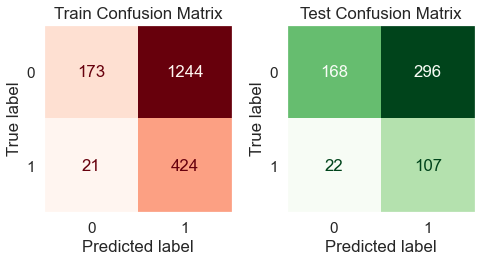

In [140]:
# predict our target with train and test data using Gaussian NB (default Parameter)
y_train_pred = gnb.predict(X_train_final_df)
y_test_pred = gnb.predict(X_test_final_df)

# find the probability of each prediction
y_train_prob = gnb.predict_proba(X_train_final_df)[:,1]
y_test_prob = gnb.predict_proba(X_test_final_df)[:,1]

# calculate the evaluation matrices
fig, axes = plt.subplots(1, 2, figsize=(7, 7))

print("="*20,"TRAINING","="*20)
print()
print('DecisionTreeClassifier \n', classification_report(y_train, y_train_pred))
print('AUC Score Train:',roc_auc_score(y_train,y_train_prob))
print("\n")
print("="*20,"TEST","="*20)
print('DecisionTreeClassifier \n', classification_report(y_test, y_test_pred))
print('ROC AUC Score Test:',roc_auc_score(y_test,y_test_prob))
print("\n")

_ = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axes[0], colorbar=False, cmap='Reds')
axes[0].set_title('Train Confusion Matrix')
axes[0].grid(False)

_ = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axes[1], colorbar=False, cmap='Greens')
axes[1].set_title('Test Confusion Matrix')
axes[1].grid(False)

plt.tight_layout()

==================== TRAINING ====================

DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1417
           1       0.52      0.51      0.51       445

    accuracy                           0.77      1862
   macro avg       0.68      0.68      0.68      1862
weighted avg       0.77      0.77      0.77      1862

AUC Score Train: 0.7439669185571669


==================== TEST ====================
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       464
           1       0.52      0.45      0.48       129

    accuracy                           0.79       593
   macro avg       0.69      0.67      0.68       593
weighted avg       0.78      0.79      0.79       593

ROC AUC Score Test: 0.7390570703020582




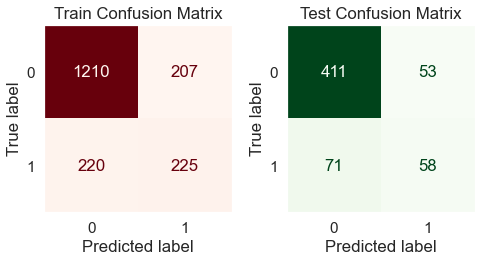

In [139]:
# predict our target with train and test data using Gaussian NB (Using Hyperparameter Tuning)
y_train_pred = gnb_best.predict(X_train_final_df)
y_test_pred = gnb_best.predict(X_test_final_df)

# find the probability of each prediction
y_train_prob = gnb_best.predict_proba(X_train_final_df)[:,1]
y_test_prob = gnb_best.predict_proba(X_test_final_df)[:,1]

# calculate the evaluation matrices
fig, axes = plt.subplots(1, 2, figsize=(7, 7))

print("="*20,"TRAINING","="*20)
print()
print('DecisionTreeClassifier \n', classification_report(y_train, y_train_pred))
print('AUC Score Train:',roc_auc_score(y_train,y_train_prob))
print("\n")
print("="*20,"TEST","="*20)
print('DecisionTreeClassifier \n', classification_report(y_test, y_test_pred))
print('ROC AUC Score Test:',roc_auc_score(y_test,y_test_prob))
print("\n")

_ = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axes[0], colorbar=False, cmap='Reds')
axes[0].set_title('Train Confusion Matrix')
axes[0].grid(False)

_ = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axes[1], colorbar=False, cmap='Greens')
axes[1].set_title('Test Confusion Matrix')
axes[1].grid(False)

plt.tight_layout()

Setelah kita bandingkan memang nilai recall dengan default parameter lebih bagus namun akurasi keseluruhan lebih buruk karena nilai precision dengan default parameter sangat buruk yaitu hanya sebesar 0.27, hal ini juga tidak baik karena secara keseluruhan model hanya memiliki nilai akurasi 0.46


Maka dapat disimpulkan masih lebih baik menggunakan model Gaussian NB degan hyperparameter `var smoothing` 1.873817422860383e-05. 



# 9. Model Inference

Selanjutnya kita gunakan data inference pada model terpilih. Pada bagian sebelumnya sudah kita pisahkan 10 data.

In [ ]:
df_inf

,age,bill_amt_4,pay_amt_5,limit_balance,sex,marital_status,education_level,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment
0,41,0.0,0.0,50000.0,1,1,3,-2,-2,-2,-2,-2,-2,0
1,27,15972.0,2925.0,200000.0,2,2,1,0,0,0,0,0,0,0
2,30,167458.0,6514.0,280000.0,2,1,1,0,0,0,0,0,0,0
3,28,4490.0,18.0,140000.0,1,2,1,0,-1,-1,0,-1,-1,0
4,23,2400.0,0.0,10000.0,2,2,1,3,2,2,7,7,7,1
5,30,0.0,36150.0,260000.0,2,1,1,1,-2,-2,-2,-2,-2,0
6,35,132806.0,4916.0,180000.0,1,1,1,0,0,0,0,0,0,0
7,22,1182.0,233.0,80000.0,2,2,1,-1,-1,-1,-1,-1,0,0
8,55,13392.0,0.0,20000.0,1,1,2,0,0,2,0,0,2,1
9,44,43546.0,576.0,250000.0,1,1,3,-1,-1,-1,-1,-1,-1,1


In [141]:
data_inf_encoded = pd.DataFrame(encoder.transform(df_inf[feature_cat_nom]).toarray())
data_inf_encoded

,0,1,2,3,4,5
0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,1.0,0.0,0.0
7,0.0,1.0,0.0,0.0,1.0,0.0
8,1.0,0.0,0.0,1.0,0.0,0.0
9,1.0,0.0,0.0,1.0,0.0,0.0


In [142]:
# Feature scaling
data_inf_scaled = scaler.transform(df_inf[feature_num])
data_inf_scaled

array([[4.16666667e-01, 1.75232819e-01, 2.94874809e-01, 6.31946832e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.97014925e-02],
       [1.25000000e-01, 2.35258525e-01, 8.48889150e-01, 2.82915091e-01,
        3.51294118e-01, 5.29356943e-01, 1.87813022e-01, 1.09134799e-01,
        2.83582090e-01],
       [1.87500000e-01, 8.04570703e-01, 4.79311156e-01, 5.75684657e-01,
        3.53588235e-01, 4.00079883e-01, 4.18261205e-01, 6.35942066e-01,
        4.02985075e-01],
       [1.45833333e-01, 1.92107063e-01, 2.55084048e-01, 3.14598373e-01,
        1.18411765e-01, 1.00519238e-01, 1.15577244e-03, 5.71071020e+00,
        1.94029851e-01],
       [4.16666667e-02, 1.84252460e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.87500000e-01, 1.75232819e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.32117632e+00, 0.00000000e+00,
        3.7

In [143]:
# Concate Columns
data_inf_final = np.concatenate([data_inf_scaled, df_inf[feature_cat_ord], data_inf_encoded], axis=1)

In [144]:
# Create DataFrame
df_inf_final = pd.DataFrame(data_inf_final, columns=[feature_num+feature_cat_ord+list(range(encoded_X_train.shape[1]))])
df_inf_final.head(3)

,age,bill_amt_4,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,limit_balance,education_level,...,pay_3,pay_4,pay_5,pay_6,0,1,2,3,4,5
0,0.416667,0.175233,0.294875,0.063195,0.000000,0.000000,0.000000,0.000000,0.059701,3.0,...,-2.0,-2.0,-2.0,-2.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.125000,0.235259,0.848889,0.282915,0.351294,0.529357,0.187813,0.109135,0.283582,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.187500,0.804571,0.479311,0.575685,0.353588,0.400080,0.418261,0.635942,0.402985,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [145]:
# predicting the target using logistic Regression model
y_pred_inf = gnb_best.predict(df_inf_final)
y_pred_inf

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [146]:
# make a dataframe from the prediction
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['target - Prediction'])
y_pred_inf_df

,target - Prediction
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,1
9,0


In [147]:
# Concate between Inference-Set and targets's Prediction 
pd.concat([df_inf, y_pred_inf_df], axis=1)

,age,bill_amt_4,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,limit_balance,sex,marital_status,education_level,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment,target - Prediction
0,41,0.0,5017.0,1103.0,0.0,0.0,0.0,0.0,50000.0,1,1,3,-2,-2,-2,-2,-2,-2,0,0
1,27,15972.0,14443.0,4938.0,5972.0,7952.0,2925.0,1718.0,200000.0,2,2,1,0,0,0,0,0,0,0,0
2,30,167458.0,8155.0,10048.0,6011.0,6010.0,6514.0,10011.0,280000.0,2,1,1,0,0,0,0,0,0,0,0
3,28,4490.0,4340.0,5491.0,2013.0,1510.0,18.0,89898.0,140000.0,1,2,1,0,-1,-1,0,-1,-1,0,0
4,23,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,2,2,1,3,2,2,7,7,7,1,1
5,30,0.0,0.0,0.0,0.0,0.0,36150.0,0.0,260000.0,2,1,1,1,-2,-2,-2,-2,-2,0,0
6,35,132806.0,7187.0,5000.0,4749.0,5141.0,4916.0,4000.0,180000.0,1,1,1,0,0,0,0,0,0,0,0
7,22,1182.0,133.0,5395.0,1182.0,266.0,233.0,0.0,80000.0,2,2,1,-1,-1,-1,-1,-1,0,0,0
8,55,13392.0,2750.0,0.0,1231.0,1777.0,0.0,4859.0,20000.0,1,1,2,0,0,2,0,0,2,1,1
9,44,43546.0,3924.0,4482.0,43676.0,38166.0,576.0,2389.0,250000.0,1,1,3,-1,-1,-1,-1,-1,-1,1,0


dari 10 data inference ada 1 prediksi yang meleset (pada index no 9).

# Conceptual Problems

**Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!**

Fungsi parameter criterion digunakan untuk menentukan metode Attribute Selection Measure (ASM). 

ASM adalah metode untuk menyeleksi atribut dengan mengukur masing2 atribut. Dengan ASM, akan lebih mudah memilih atribut terbaik untuk node pohon. ASM memberikan peringkat untuk setiap fitur (atau atribut) untuk memisahkan kumpulan data yang diberikan.

Best score attribute akan dipilih sebagai splitting attribute. Ukuran seleksi yang paling populer adalah Information Gain (entropy) dan Gini Index.

`Entropy` digunakan untuk mengukur ketidakmurnian dalam atribut tertentu dengan menentukan randomness dalam data. Semakin kecil entropy, semakin baik

<img src='https://spicerrobotboy.files.wordpress.com/2012/01/decision-tree-equations.png' />

Information gain menghitung perbedaan antara entropi sebelum splitting dan rata-rata entropi setelah splitting berdasarkan nilai atribut yang diberikan.

Jadi, dengan menghitung penurunan ukuran entropy setiap atribut, kita dapat menghitung perolehan informasinya. Atribut dengan information gain tertinggi dipilih sebagai atribut splitting pada node.


**Apakah fungsi dari pruning pada Tree model?**

Fungsi pruning pada tree model adalah mengidentifikasikan dan membuang cabang (leaf) yang tidak diperlukan pada pohon keputusan yang telah terbentuk. Hal ini dikarenakan pohon keputusan yang dikontruksi dapat berukuran besar, maka dapat disederhanakan dengan melakukan pemangkasan. Jika tidak dilakukan pemangkasan cabang, maka model akan cenderung overfit.

**Bagaimana cara memilih K yang optimal pada KNN?**

- Bisa menggunakan fungsi Grid Search CV, jika targetnya memiliki jumlah kategori yang genap seperti pada kasus kali ini maka gunakan k yang ganjil sebaliknya jika jumlah kategori ganjil maka gunakan jumlah k yang genap.

<img src='http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png'/>



**Jelaskan apa yang kalian ketahui tentang Cross Validation!**

Cross validation adalah suatu metode untuk melakukan pembagian pada data train menjadi beberapa bagian dengan beberap fold yang disilang, yang kemudian dilakukan pengujian pada model antar grup yang sudah dibagi dan dilakukan pengulangan.

<img src='https://rahmadyatrias.files.wordpress.com/2020/04/041720_1702_crossvalida1.png?w=863'/>

Cross validation digunakan untuk menentukan model yang paling baik dengan algoritma dan hyperparameter yang berberda


**Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!**

- Accuracy

Accuracy adalah score ketepatan model dalam memprediksi label target.

- Precision 

precision adalah perbandingan antara True Positive (TP) dengan banyaknya data yang diprediksi positif. Atau bisa juga dituliskan secara matemetis:

<img src='https://miro.medium.com/max/426/0*fD_fCLwvjNnp2Nel'/>

- Recall 

Sedangkan untuk Recall, secara definisi adalah perbandingan antara True Positive (TP) dengan banyaknya data yang sebenarnya positif. Dan dapat dituliskan secara matematis seperti ini:

<img src='https://miro.medium.com/max/362/0*jnTAutFpHEVqqBHJ'/>

- F1-Score adalah harmonic mean dari precision dan recall. Yang secara matematik dapat ditulis begini:

<img src='https://miro.medium.com/max/562/0*RdOj9EZ6TbVmwWmi' />